### Stellar Classification vis-à-vis **Convolutional Neural Network**

AUTHOR:  Anurag Dutta (anuragdutta.research@gmail.com)

CREATED: 2023-01-03 11:47:55

DATASET: https://github.com/Anurag-Dutta/Stellar-Classification-vis---vis-Convolutional-Neural-Network/tree/main/dataset

### Load Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

### Prepare/collect data

In [13]:
import os

path = os.listdir('dataset/train/')
classes = {'galaxy':0, 'star':1}

In [14]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'dataset/train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [4]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [5]:
np.unique(Y)

array([0, 1])

In [6]:
pd.Series(Y).value_counts()

1    3044
0     942
dtype: int64

In [7]:
X.shape, X_updated.shape

((3986, 200, 200), (3986, 40000))

### Visualize data

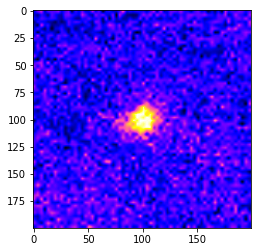

In [8]:
plt.imshow(X[0], cmap='gnuplot2')

### Prepare data

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3986, 40000)

### Split Data

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [11]:
xtrain.shape, xtest.shape

((3188, 40000), (798, 40000))

### Feature Scaling

In [12]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Train Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [14]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [15]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [16]:
knc = KNeighborsClassifier()
knc.fit(xtrain, ytrain)

KNeighborsClassifier()

In [17]:
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)

RandomForestClassifier()

In [18]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

In [19]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

### Evaluation

In [20]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 0.989021329987453
Testing Score: 0.7644110275689223


In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9416562107904642
Testing Score: 0.7982456140350878


In [22]:
print("Training Score:", knc.score(xtrain, ytrain))
print("Testing Score:", knc.score(xtest, ytest))

Training Score: 0.8252823086574655
Testing Score: 0.7957393483709273


In [23]:
print("Training Score:", rfc.score(xtrain, ytrain))
print("Testing Score:", rfc.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8145363408521303


In [24]:
print("Training Score:", gnb.score(xtrain, ytrain))
print("Testing Score:", gnb.score(xtest, ytest))

Training Score: 0.7020075282308658
Testing Score: 0.6766917293233082


In [25]:
print("Training Score:", dt.score(xtrain, ytrain))
print("Testing Score:", dt.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.7518796992481203


### Prediction (SVM)

Precision:  0.7984189723320159
Recall:  0.9869706840390879
F1 Score:  0.8827385287691187


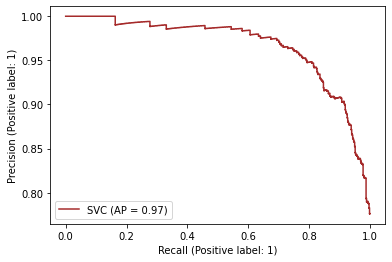

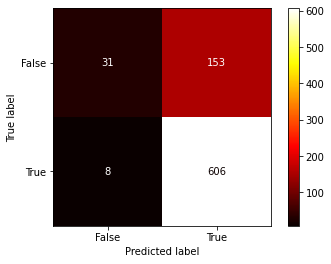

In [26]:
from sklearn import metrics
pred = sv.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(sv, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (RF)

Precision:  0.8123324396782842
Recall:  0.9869706840390879
F1 Score:  0.8911764705882353


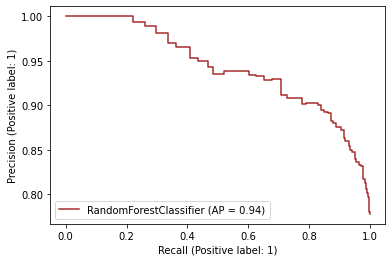

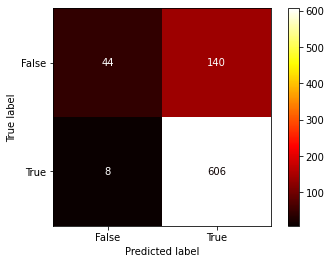

In [27]:
from sklearn import metrics
pred = rfc.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(rfc, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (KNN)

Precision:  0.8043184885290149
Recall:  0.9706840390879479
F1 Score:  0.8797047970479704


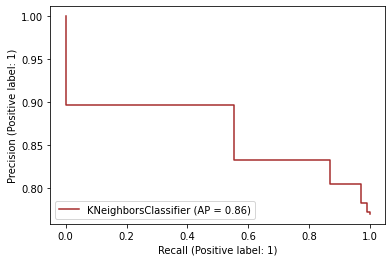

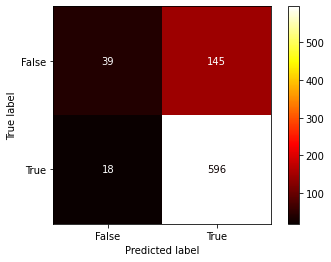

In [28]:
from sklearn import metrics
pred = knc.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(knc, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (GNB)

Precision:  0.7956810631229236
Recall:  0.7801302931596091
F1 Score:  0.7878289473684211


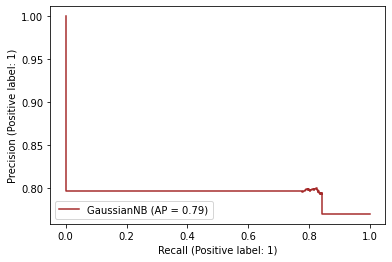

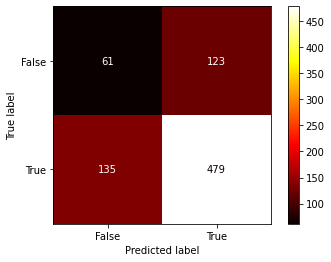

In [29]:
from sklearn import metrics
pred = gnb.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(gnb, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (LR)

Precision:  0.8150887573964497
Recall:  0.8973941368078175
F1 Score:  0.8542635658914729


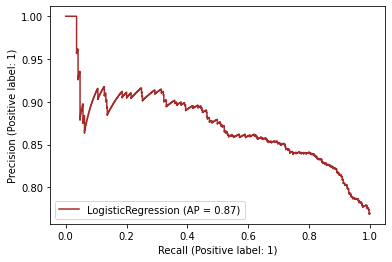

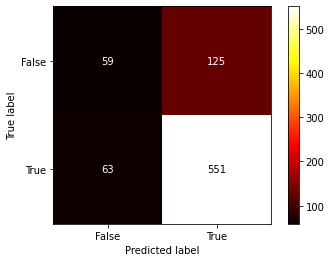

In [30]:
from sklearn import metrics
pred = lg.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
f1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(lg, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

### Prediction (DT)

Precision:  0.8354838709677419
Recall:  0.8436482084690554
F1 Score:  0.8542635658914729


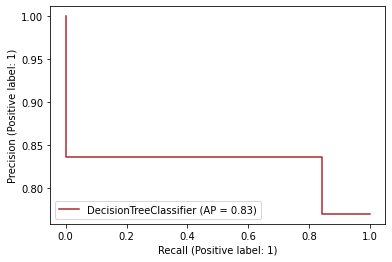

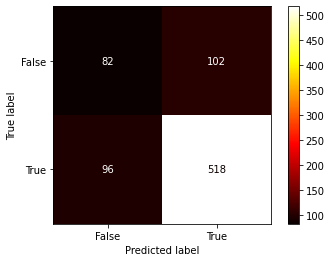

In [31]:
from sklearn import metrics
pred = dt.predict(xtest)
precision = precision_score(ytest, pred)
recall = recall_score(ytest, pred)
ff1_score = (2 * precision * recall) / (precision + recall)
print('Precision: ',precision)
print('Recall: ',recall)
print('F1 Score: ',f1_score)
disp = plot_precision_recall_curve(dt, xtest, ytest, color = 'brown')
confusion_matrix = metrics.confusion_matrix(ytest, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap='hot')
plt.show()

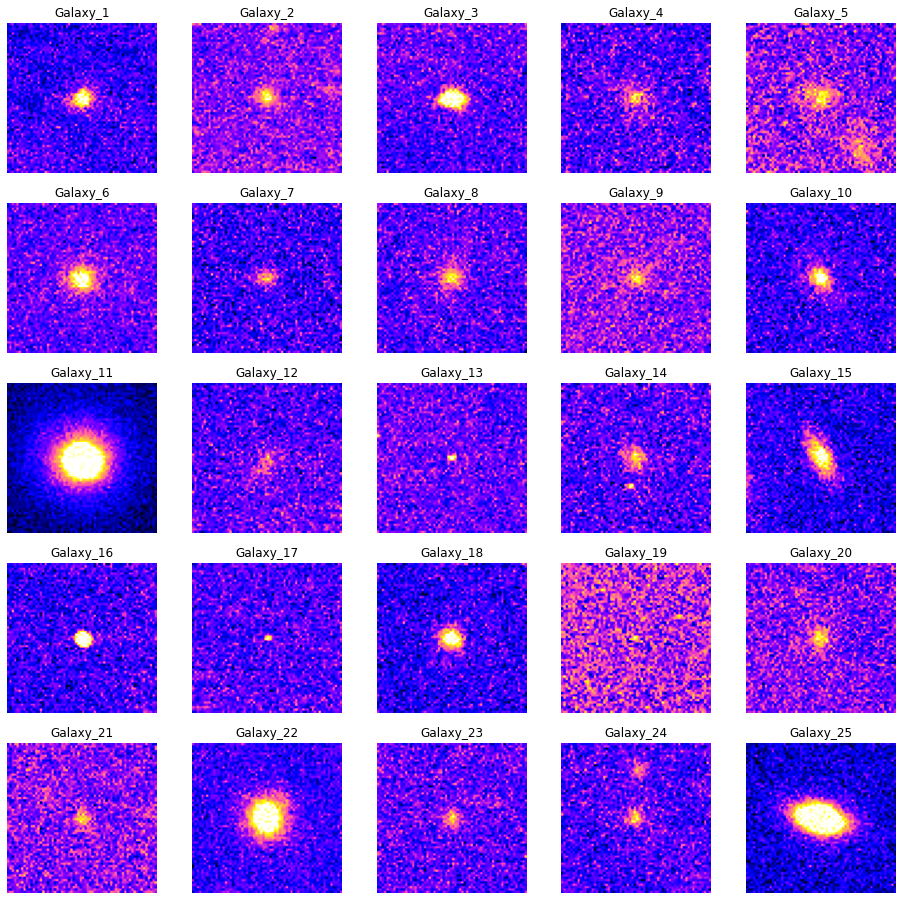

In [54]:
plt.figure(figsize=(16, 16))
p = os.listdir('dataset/test/')
c=1
for i in os.listdir('dataset/test/galaxy/')[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread('dataset/test/galaxy/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    plt.title('Galaxy_'+str(c))
    plt.imshow(img, cmap='gnuplot2')
    plt.axis('off')
    c+=1

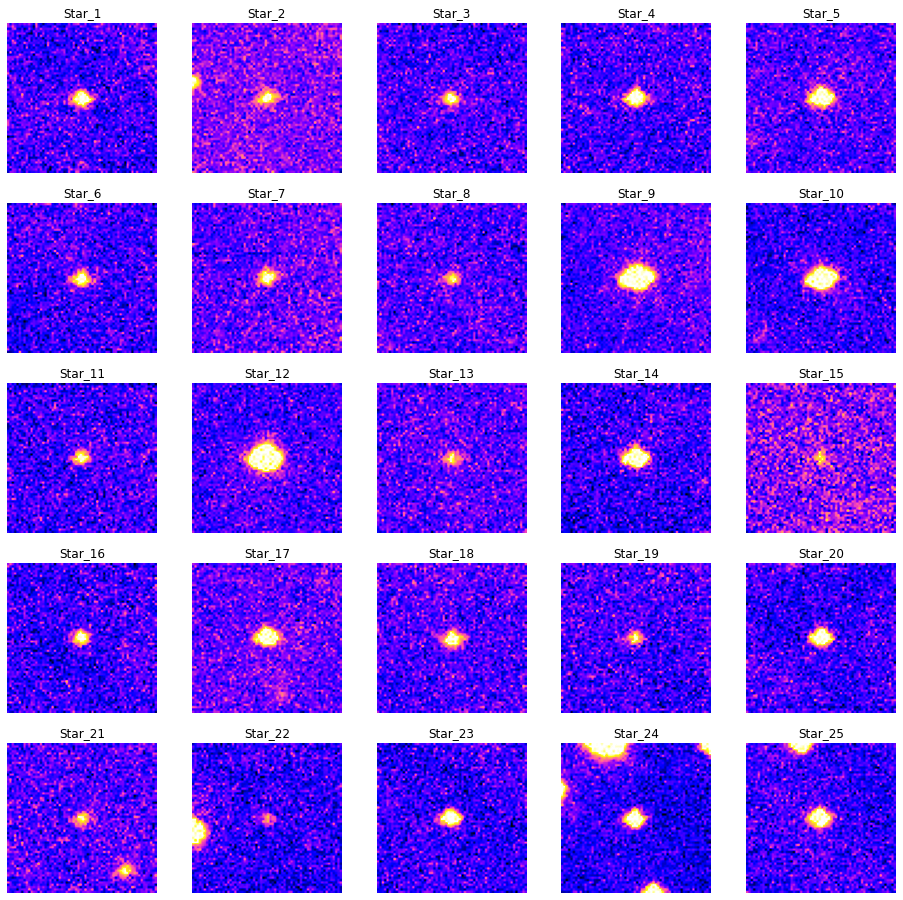

In [55]:
plt.figure(figsize=(16, 16))
p = os.listdir('dataset/test/')
c=1
for i in os.listdir('dataset/test/star/')[:25]:
    plt.subplot(5,5,c)
    
    img = cv2.imread('dataset/test/star/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    plt.title('Star_'+str(c))
    plt.imshow(img, cmap='gnuplot2')
    plt.axis('off')
    c+=1